مدل بیرینگ را وارد کنید (مثلاً SKF_6205):  SKF_6214
سرعت شفت (Hz):  50


فرکانس‌های خرابی برای SKF_6214:
BPFO: 225.67 Hz
BPFI: 324.33 Hz
BSF: 134.89 Hz
FTF: 20.52 Hz


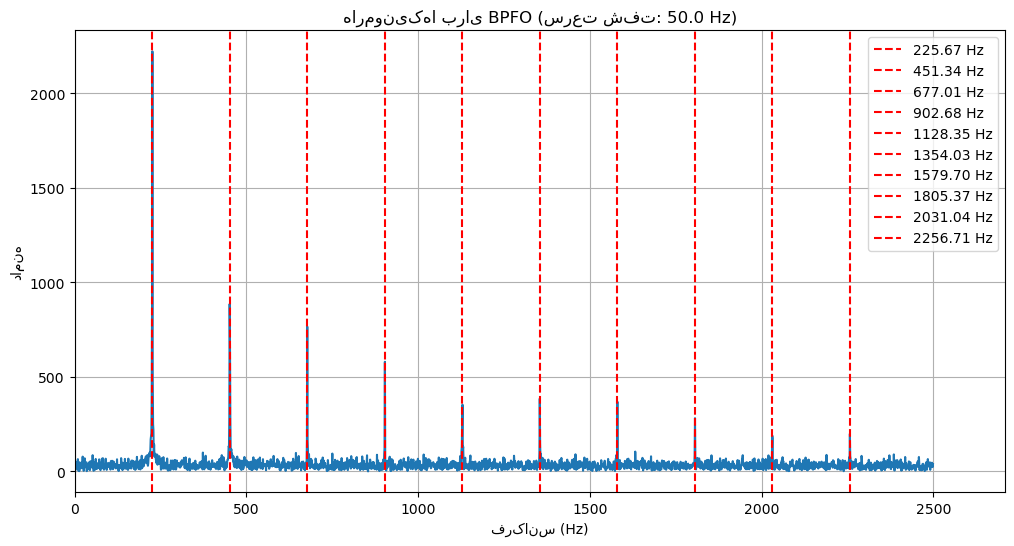

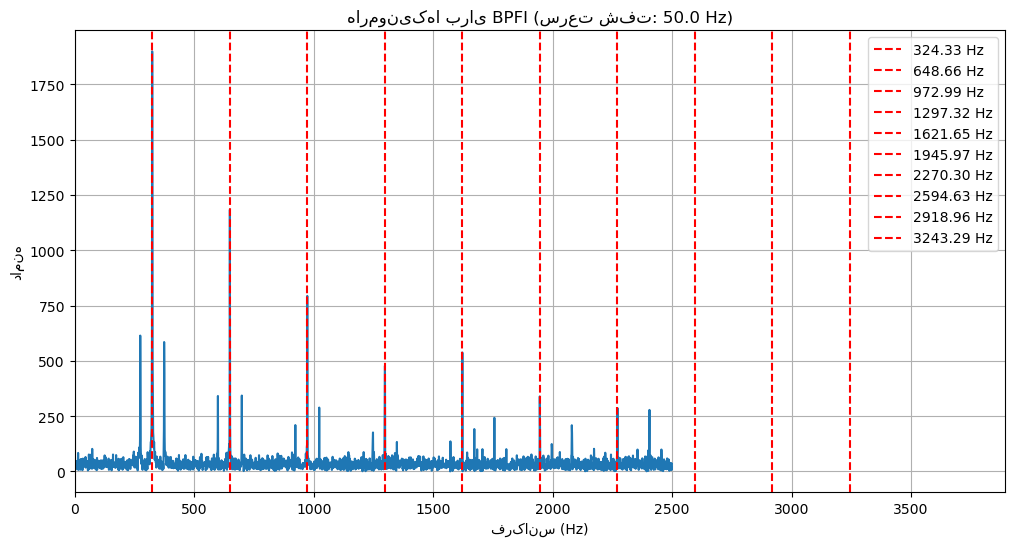

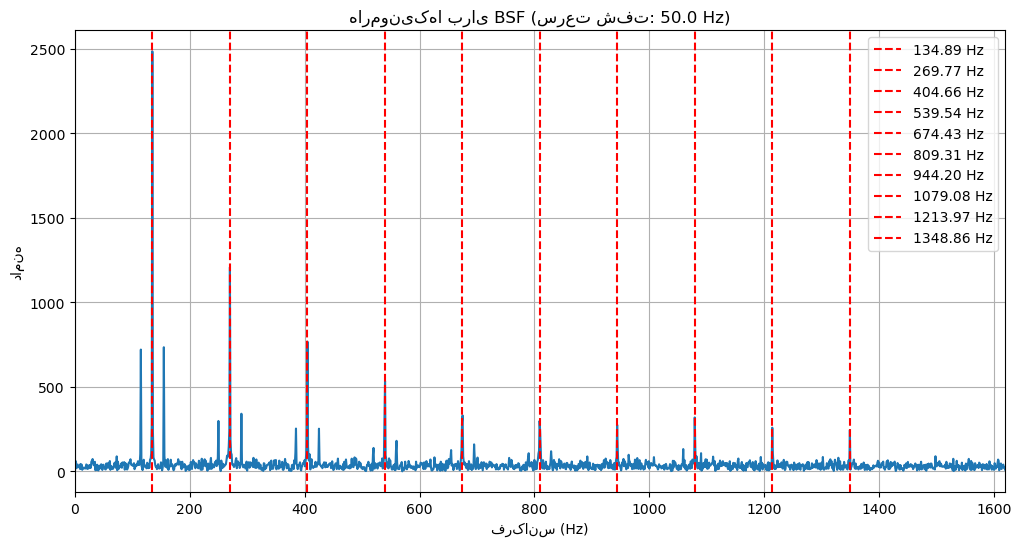

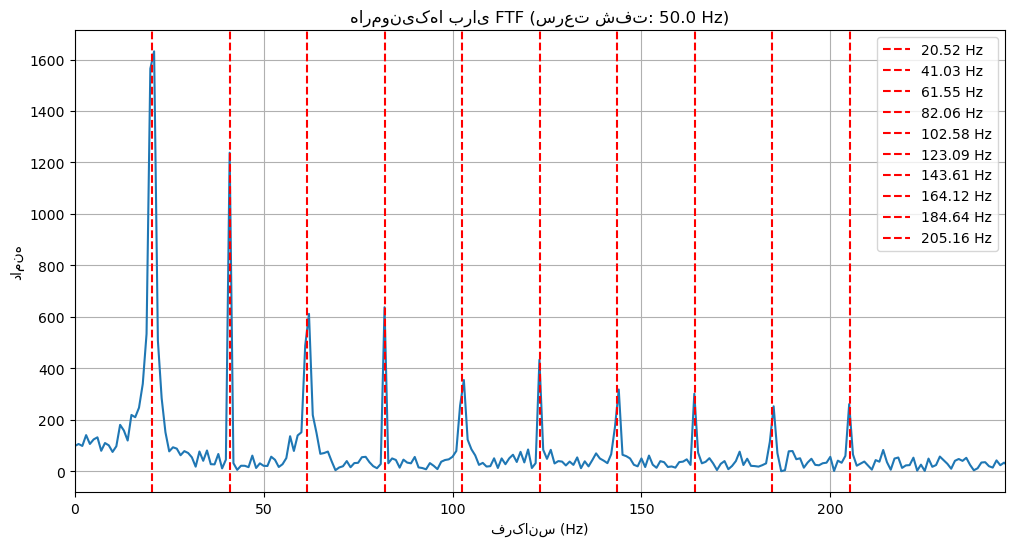

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, Tuple

# کتابخانه جامع از بیرینگ‌های SKF و FAG (پنهان شده)
bearing_library = {
    'SKF_6000': {'N': 6, 'Bd': 4.762, 'Pd': 17.0, 'beta': 0},
    'SKF_6001': {'N': 6, 'Bd': 4.762, 'Pd': 19.0, 'beta': 0},
    'SKF_6002': {'N': 6, 'Bd': 5.556, 'Pd': 22.0, 'beta': 0},
    'SKF_6003': {'N': 6, 'Bd': 5.556, 'Pd': 24.0, 'beta': 0},
    'SKF_6004': {'N': 7, 'Bd': 5.556, 'Pd': 28.0, 'beta': 0},
    'SKF_6005': {'N': 7, 'Bd': 6.35, 'Pd': 32.0, 'beta': 0},
    'SKF_6006': {'N': 6, 'Bd': 7.938, 'Pd': 36.0, 'beta': 0},
    'SKF_6007': {'N': 7, 'Bd': 7.938, 'Pd': 40.0, 'beta': 0},
    'SKF_6008': {'N': 7, 'Bd': 9.525, 'Pd': 44.0, 'beta': 0},
    'SKF_6009': {'N': 8, 'Bd': 9.525, 'Pd': 48.0, 'beta': 0},
    'SKF_6010': {'N': 7, 'Bd': 11.112, 'Pd': 52.0, 'beta': 0},
    'SKF_6011': {'N': 7, 'Bd': 11.112, 'Pd': 57.0, 'beta': 0},
    'SKF_6012': {'N': 8, 'Bd': 11.112, 'Pd': 61.0, 'beta': 0},
    'SKF_6013': {'N': 8, 'Bd': 12.7, 'Pd': 65.0, 'beta': 0},
    'SKF_6014': {'N': 8, 'Bd': 12.7, 'Pd': 69.0, 'beta': 0},
    'SKF_6015': {'N': 8, 'Bd': 14.288, 'Pd': 73.0, 'beta': 0},
    'SKF_6200': {'N': 7, 'Bd': 4.762, 'Pd': 20.0, 'beta': 0},
    'SKF_6201': {'N': 7, 'Bd': 5.556, 'Pd': 22.0, 'beta': 0},
    'SKF_6202': {'N': 8, 'Bd': 5.556, 'Pd': 25.0, 'beta': 0},
    'SKF_6203': {'N': 8, 'Bd': 6.747, 'Pd': 28.5, 'beta': 0},
    'SKF_6204': {'N': 8, 'Bd': 7.938, 'Pd': 33.5, 'beta': 0},
    'SKF_6205': {'N': 9, 'Bd': 7.938, 'Pd': 39.0, 'beta': 0},
    'SKF_6206': {'N': 9, 'Bd': 9.525, 'Pd': 44.5, 'beta': 0},
    'SKF_6207': {'N': 9, 'Bd': 11.112, 'Pd': 50.0, 'beta': 0},
    'SKF_6208': {'N': 9, 'Bd': 11.906, 'Pd': 55.0, 'beta': 0},
    'SKF_6209': {'N': 10, 'Bd': 11.906, 'Pd': 60.0, 'beta': 0},
    'SKF_6210': {'N': 10, 'Bd': 12.7, 'Pd': 65.0, 'beta': 0},
    'SKF_6211': {'N': 10, 'Bd': 14.288, 'Pd': 72.5, 'beta': 0},
    'SKF_6212': {'N': 10, 'Bd': 15.081, 'Pd': 77.5, 'beta': 0},
    'SKF_6213': {'N': 11, 'Bd': 15.081, 'Pd': 82.5, 'beta': 0},
    'SKF_6214': {'N': 11, 'Bd': 15.875, 'Pd': 88.5, 'beta': 0},
    'SKF_6215': {'N': 11, 'Bd': 16.669, 'Pd': 93.5, 'beta': 0},
    'SKF_6216': {'N': 11, 'Bd': 17.462, 'Pd': 98.5, 'beta': 0},
    'SKF_6217': {'N': 12, 'Bd': 17.462, 'Pd': 103.5, 'beta': 0},
    'SKF_6218': {'N': 12, 'Bd': 18.256, 'Pd': 108.5, 'beta': 0},
    'SKF_6219': {'N': 12, 'Bd': 19.05, 'Pd': 113.5, 'beta': 0},
    'SKF_6300': {'N': 6, 'Bd': 5.556, 'Pd': 22.5, 'beta': 0},
    'SKF_6301': {'N': 6, 'Bd': 6.35, 'Pd': 24.5, 'beta': 0},
    'SKF_6302': {'N': 7, 'Bd': 6.35, 'Pd': 28.0, 'beta': 0},
    'SKF_6303': {'N': 7, 'Bd': 7.144, 'Pd': 31.0, 'beta': 0},
    'SKF_6304': {'N': 7, 'Bd': 8.731, 'Pd': 35.5, 'beta': 0},
    'SKF_6305': {'N': 8, 'Bd': 8.731, 'Pd': 41.0, 'beta': 0},
    'SKF_6306': {'N': 8, 'Bd': 10.319, 'Pd': 46.5, 'beta': 0},
    'SKF_6307': {'N': 8, 'Bd': 11.906, 'Pd': 53.0, 'beta': 0},
    'SKF_6308': {'N': 8, 'Bd': 13.494, 'Pd': 58.5, 'beta': 0},
    'SKF_6309': {'N': 8, 'Bd': 15.081, 'Pd': 65.0, 'beta': 0},
    'SKF_6310': {'N': 9, 'Bd': 15.081, 'Pd': 71.0, 'beta': 0},
    'SKF_6311': {'N': 9, 'Bd': 16.669, 'Pd': 77.5, 'beta': 0},
    'SKF_6312': {'N': 9, 'Bd': 17.462, 'Pd': 83.0, 'beta': 0},
    'SKF_6313': {'N': 9, 'Bd': 19.05, 'Pd': 89.0, 'beta': 0},
    'SKF_6314': {'N': 9, 'Bd': 20.638, 'Pd': 95.0, 'beta': 0},
    'SKF_6315': {'N': 10, 'Bd': 20.638, 'Pd': 101.0, 'beta': 0},
    'SKF_6316': {'N': 10, 'Bd': 22.225, 'Pd': 107.0, 'beta': 0},
    'SKF_6317': {'N': 10, 'Bd': 22.225, 'Pd': 113.0, 'beta': 0},
    'SKF_6318': {'N': 10, 'Bd': 23.812, 'Pd': 119.0, 'beta': 0},
    'SKF_6319': {'N': 11, 'Bd': 23.812, 'Pd': 125.0, 'beta': 0},
    'SKF_6403': {'N': 8, 'Bd': 7.938, 'Pd': 32.5, 'beta': 0},
    'SKF_6404': {'N': 8, 'Bd': 9.525, 'Pd': 37.5, 'beta': 0},
    'SKF_6405': {'N': 8, 'Bd': 10.319, 'Pd': 42.5, 'beta': 0},
    'SKF_6406': {'N': 9, 'Bd': 11.112, 'Pd': 47.5, 'beta': 0},
    'SKF_6407': {'N': 9, 'Bd': 12.7, 'Pd': 52.5, 'beta': 0},
    'SKF_6408': {'N': 9, 'Bd': 13.494, 'Pd': 57.5, 'beta': 0},
    'SKF_6409': {'N': 9, 'Bd': 14.288, 'Pd': 62.5, 'beta': 0},
    'SKF_6410': {'N': 10, 'Bd': 15.081, 'Pd': 67.5, 'beta': 0},
    'SKF_6411': {'N': 10, 'Bd': 15.875, 'Pd': 72.5, 'beta': 0},
    'SKF_6412': {'N': 10, 'Bd': 16.669, 'Pd': 77.5, 'beta': 0},
    'SKF_7005_AC': {'N': 10, 'Bd': 6.35, 'Pd': 30.0, 'beta': 25},
    'SKF_7006_AC': {'N': 11, 'Bd': 7.144, 'Pd': 35.0, 'beta': 25},
    'SKF_7205_AC': {'N': 9, 'Bd': 7.938, 'Pd': 35.0, 'beta': 40},
    'SKF_7206_AC': {'N': 9, 'Bd': 9.525, 'Pd': 41.0, 'beta': 40},
    'FAG_6000': {'N': 6, 'Bd': 4.762, 'Pd': 17.0, 'beta': 0},
    'FAG_6001': {'N': 6, 'Bd': 4.762, 'Pd': 19.0, 'beta': 0},
    'FAG_6002': {'N': 6, 'Bd': 5.556, 'Pd': 22.0, 'beta': 0},
    'FAG_6003': {'N': 6, 'Bd': 5.556, 'Pd': 24.0, 'beta': 0},
    'FAG_6004': {'N': 7, 'Bd': 5.556, 'Pd': 28.0, 'beta': 0},
    'FAG_6005': {'N': 7, 'Bd': 6.35, 'Pd': 32.0, 'beta': 0},
    'FAG_6006': {'N': 6, 'Bd': 7.938, 'Pd': 36.0, 'beta': 0},
    'FAG_6007': {'N': 7, 'Bd': 7.938, 'Pd': 40.0, 'beta': 0},
    'FAG_6008': {'N': 7, 'Bd': 9.525, 'Pd': 44.0, 'beta': 0},
    'FAG_6009': {'N': 8, 'Bd': 9.525, 'Pd': 48.0, 'beta': 0},
    'FAG_6010': {'N': 7, 'Bd': 11.112, 'Pd': 52.0, 'beta': 0},
    'FAG_6011': {'N': 7, 'Bd': 11.112, 'Pd': 57.0, 'beta': 0},
    'FAG_6012': {'N': 8, 'Bd': 11.112, 'Pd': 61.0, 'beta': 0},
    'FAG_6013': {'N': 8, 'Bd': 12.7, 'Pd': 65.0, 'beta': 0},
    'FAG_6014': {'N': 8, 'Bd': 12.7, 'Pd': 69.0, 'beta': 0},
    'FAG_6015': {'N': 8, 'Bd': 14.288, 'Pd': 73.0, 'beta': 0},
    'FAG_6200': {'N': 7, 'Bd': 4.762, 'Pd': 20.0, 'beta': 0},
    'FAG_6201': {'N': 7, 'Bd': 5.556, 'Pd': 22.0, 'beta': 0},
    'FAG_6202': {'N': 8, 'Bd': 5.556, 'Pd': 25.0, 'beta': 0},
    'FAG_6203': {'N': 8, 'Bd': 6.747, 'Pd': 28.5, 'beta': 0},
    'FAG_6204': {'N': 8, 'Bd': 7.938, 'Pd': 33.5, 'beta': 0},
    'FAG_6205': {'N': 9, 'Bd': 7.938, 'Pd': 39.0, 'beta': 0},
    'FAG_6206': {'N': 9, 'Bd': 9.525, 'Pd': 44.5, 'beta': 0},
    'FAG_6207': {'N': 9, 'Bd': 11.112, 'Pd': 50.0, 'beta': 0},
    'FAG_6208': {'N': 9, 'Bd': 11.906, 'Pd': 55.0, 'beta': 0},
    'FAG_6209': {'N': 10, 'Bd': 11.906, 'Pd': 60.0, 'beta': 0},
    'FAG_6210': {'N': 10, 'Bd': 12.7, 'Pd': 65.0, 'beta': 0},
    'FAG_6211': {'N': 10, 'Bd': 14.288, 'Pd': 72.5, 'beta': 0},
    'FAG_6212': {'N': 10, 'Bd': 15.081, 'Pd': 77.5, 'beta': 0},
    'FAG_6213': {'N': 11, 'Bd': 15.081, 'Pd': 82.5, 'beta': 0},
    'FAG_6214': {'N': 11, 'Bd': 15.875, 'Pd': 88.5, 'beta': 0},
    'FAG_6215': {'N': 11, 'Bd': 16.669, 'Pd': 93.5, 'beta': 0},
    'FAG_6216': {'N': 11, 'Bd': 17.462, 'Pd': 98.5, 'beta': 0},
    'FAG_6217': {'N': 12, 'Bd': 17.462, 'Pd': 103.5, 'beta': 0},
    'FAG_6218': {'N': 12, 'Bd': 18.256, 'Pd': 108.5, 'beta': 0},
    'FAG_6219': {'N': 12, 'Bd': 19.05, 'Pd': 113.5, 'beta': 0},
    'FAG_6300': {'N': 6, 'Bd': 5.556, 'Pd': 22.5, 'beta': 0},
    'FAG_6301': {'N': 6, 'Bd': 6.35, 'Pd': 24.5, 'beta': 0},
    'FAG_6302': {'N': 7, 'Bd': 6.35, 'Pd': 28.0, 'beta': 0},
    'FAG_6303': {'N': 7, 'Bd': 7.144, 'Pd': 31.0, 'beta': 0},
    'FAG_6304': {'N': 7, 'Bd': 8.731, 'Pd': 35.5, 'beta': 0},
    'FAG_6305': {'N': 8, 'Bd': 8.731, 'Pd': 41.0, 'beta': 0},
    'FAG_6306': {'N': 8, 'Bd': 10.319, 'Pd': 46.5, 'beta': 0},
    'FAG_6307': {'N': 8, 'Bd': 11.906, 'Pd': 53.0, 'beta': 0},
    'FAG_6308': {'N': 8, 'Bd': 13.494, 'Pd': 58.5, 'beta': 0},
    'FAG_6309': {'N': 8, 'Bd': 15.081, 'Pd': 65.0, 'beta': 0},
    'FAG_6310': {'N': 9, 'Bd': 15.081, 'Pd': 71.0, 'beta': 0},
    'FAG_6311': {'N': 9, 'Bd': 16.669, 'Pd': 77.5, 'beta': 0},
    'FAG_6312': {'N': 9, 'Bd': 17.462, 'Pd': 83.0, 'beta': 0},
    'FAG_6313': {'N': 9, 'Bd': 19.05, 'Pd': 89.0, 'beta': 0},
    'FAG_6314': {'N': 9, 'Bd': 20.638, 'Pd': 95.0, 'beta': 0},
    'FAG_6315': {'N': 10, 'Bd': 20.638, 'Pd': 101.0, 'beta': 0},
    'FAG_6316': {'N': 10, 'Bd': 22.225, 'Pd': 107.0, 'beta': 0},
    'FAG_6317': {'N': 10, 'Bd': 22.225, 'Pd': 113.0, 'beta': 0},
    'FAG_6318': {'N': 10, 'Bd': 23.812, 'Pd': 119.0, 'beta': 0},
    'FAG_6319': {'N': 11, 'Bd': 23.812, 'Pd': 125.0, 'beta': 0},
    'FAG_6403': {'N': 8, 'Bd': 7.938, 'Pd': 32.5, 'beta': 0},
    'FAG_6404': {'N': 8, 'Bd': 9.525, 'Pd': 37.5, 'beta': 0},
    'FAG_6405': {'N': 8, 'Bd': 10.319, 'Pd': 42.5, 'beta': 0},
    'FAG_6406': {'N': 9, 'Bd': 11.112, 'Pd': 47.5, 'beta': 0},
    'FAG_6407': {'N': 9, 'Bd': 12.7, 'Pd': 52.5, 'beta': 0},
    'FAG_6408': {'N': 9, 'Bd': 13.494, 'Pd': 57.5, 'beta': 0},
    'FAG_6409': {'N': 9, 'Bd': 14.288, 'Pd': 62.5, 'beta': 0},
    'FAG_6410': {'N': 10, 'Bd': 15.081, 'Pd': 67.5, 'beta': 0},
    'FAG_6411': {'N': 10, 'Bd': 15.875, 'Pd': 72.5, 'beta': 0},
    'FAG_6412': {'N': 10, 'Bd': 16.669, 'Pd': 77.5, 'beta': 0},
    'FAG_7005_AC': {'N': 10, 'Bd': 6.35, 'Pd': 30.0, 'beta': 25},
    'FAG_7006_AC': {'N': 11, 'Bd': 7.144, 'Pd': 35.0, 'beta': 25},
    'FAG_7205_AC': {'N': 9, 'Bd': 7.938, 'Pd': 35.0, 'beta': 40},
    'FAG_7206_AC': {'N': 9, 'Bd': 9.525, 'Pd': 41.0, 'beta': 40},
}

def calculate_fault_frequencies(bearing_params: Dict, shaft_speed_hz: float) -> Dict[str, float]:
    """
    محاسبه فرکانس‌های خرابی بیرینگ بر اساس فرمول‌های استاندارد.
    fr: سرعت شفت (Hz)
    BPFO: Ball Pass Frequency Outer race
    BPFI: Ball Pass Frequency Inner race
    BSF: Ball Spin Frequency
    FTF: Fundamental Train Frequency
    """
    N = bearing_params['N']
    Bd = bearing_params['Bd'] / 1000 # تبدیل به متر
    Pd = bearing_params['Pd'] / 1000
    beta = np.radians(bearing_params['beta'])
    fr = shaft_speed_hz

    cos_beta = np.cos(beta)

    BPFO = (N / 2.0) * fr * (1 - (Bd / Pd) * cos_beta)
    BPFI = (N / 2.0) * fr * (1 + (Bd / Pd) * cos_beta)
    BSF = (Pd / (2.0 * Bd)) * fr * (1 - ((Bd / Pd) * cos_beta)**2)
    FTF = (1 / 2.0) * fr * (1 - (Bd / Pd) * cos_beta)

    return {
        'BPFO': BPFO,
        'BPFI': BPFI,
        'BSF': BSF,
        'FTF': FTF
    }

def plot_harmonics_for_fault(freq_name: str, base_freq: float, shaft_speed_hz: float, fs: float = 5000.0, duration: float = 1.0, num_harmonics: int = 10):
    """
    رسم نمودار جداگانه برای هارمونیک‌های یک فرکانس خرابی خاص.
    برای BPFI، سایدبندها در دو طرف هر هارمونیک با فاصله fr و دامنه حداکثر 0.3 هارمونیک اصلی.
    برای BSF، سایدبندها در دو طرف هر هارمونیک با فاصله 0.4*fr و دامنه حداکثر 0.3 هارمونیک اصلی.
    فرکانس‌های سایدبند در راهنما نمایش داده نمی‌شوند.
    """
    t = np.linspace(0, duration, int(fs * duration))
    signal = np.random.normal(0, 0.5, len(t))

    harmonics = []
    for k in range(1, num_harmonics + 1):
        harm_freq = k * base_freq
        signal += np.sin(2 * np.pi * harm_freq * t) / k
        harmonics.append(harm_freq)

        # اضافه کردن سایدبندها برای BPFI
        if freq_name == 'BPFI':
            side_plus = harm_freq + shaft_speed_hz
            side_minus = harm_freq - shaft_speed_hz
            if side_minus > 0: # جلوگیری از فرکانس منفی
                signal += 0.3 * np.sin(2 * np.pi * side_minus * t) / k
            signal += 0.3 * np.sin(2 * np.pi * side_plus * t) / k

        # اضافه کردن سایدبندها برای BSF
        elif freq_name == 'BSF':
            side_plus = harm_freq + 0.4 * shaft_speed_hz
            side_minus = harm_freq - 0.4 * shaft_speed_hz
            if side_minus > 0: # جلوگیری از فرکانس منفی
                signal += 0.3 * np.sin(2 * np.pi * side_minus * t) / k
            signal += 0.3 * np.sin(2 * np.pi * side_plus * t) / k

    fft = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(t), 1/fs)
    magnitude = np.abs(fft)[:len(t)//2]
    freqs_plot = freqs[:len(t)//2]

    plt.figure(figsize=(12, 6))
    plt.plot(freqs_plot, magnitude)
    plt.xlabel('فرکانس (Hz)')
    plt.ylabel('دامنه')
    plt.title(f'هارمونیک‌ها برای {freq_name} (سرعت شفت: {shaft_speed_hz} Hz)')
    # علامت‌گذاری فقط هارمونیک‌های اصلی
    for i, harm in enumerate(sorted(set(harmonics)), 1): # مرتب و منحصر به فرد
        plt.axvline(x=harm, color='r', linestyle='--', label=f'{harm:.2f} Hz')

    plt.legend()
    plt.grid(True)
    max_freq = max(harmonics) if harmonics else 500
    plt.xlim(0, max_freq * 1.2)
    plt.show()

# بخش اصلی
if __name__ == "__main__":
    bearing_to_plot = input("مدل بیرینگ را وارد کنید (مثلاً SKF_6205): ").strip()

    if bearing_to_plot not in bearing_library:
        print(f"مدل {bearing_to_plot} موجود نیست. لطفاً پارامترهای بیرینگ را وارد کنید.")
        N = int(input("تعداد عناصر غلتان (N): "))
        Bd = float(input("قطر توپ/رولر (Bd mm): "))
        Pd = float(input("قطر pitch (Pd mm): "))
        beta = float(input("زاویه تماس (beta درجه): "))
        params = {'N': N, 'Bd': Bd, 'Pd': Pd, 'beta': beta}
    else:
        params = bearing_library[bearing_to_plot]

    shaft_speed_input = input("سرعت شفت (Hz): ").strip()
    try:
        shaft_speed_hz = float(shaft_speed_input)
    except ValueError:
        shaft_speed_hz = 30.0

    faults = calculate_fault_frequencies(params, shaft_speed_hz)

    print(f"فرکانس‌های خرابی برای {bearing_to_plot if bearing_to_plot in bearing_library else 'بیرینگ سفارشی'}:")
    for name, freq in faults.items():
        print(f"{name}: {freq:.2f} Hz")

    for freq_name, base_freq in faults.items():
        plot_harmonics_for_fault(freq_name, base_freq, shaft_speed_hz)